# Luiz Zairo Bastos Viana - 499995


# Lista 1 - Regressão Linear, Polinomial e Regularização

**Disciplina:** Aprendizagem de Máquina
**Período:** 2025.1
**Professor:** César Lincoln Cavalcante Mattos

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações de plotagem
plt.style.use('seaborn-v0_8-darkgrid') # Estilo de gráfico
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)}) # Tamanho da fonte e figura

# Questão 1

Considere o conjunto de dados disponível em `artificial1d.csv` organizado em duas colunas, x e y. Seja um modelo de regressão linear para ŷ = f(x).

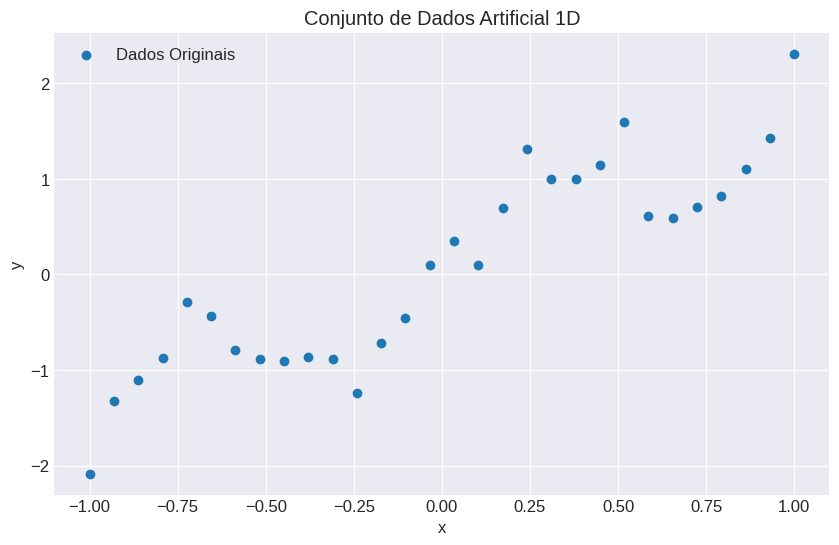

In [68]:
# Carregar os dados
data_q1 = pd.read_csv('./data/artificial1d.csv', header=None, names=['x', 'y'])
X_q1 = data_q1['x'].values
y_q1 = data_q1['y'].values

# Adicionar o termo de bias (coluna de uns) a X
# np.c_ é uma forma conveniente de concatenar colunas
X_b_q1 = np.c_[np.ones((X_q1.shape[0], 1)), X_q1]

# Visualizar os dados
plt.scatter(X_q1, y_q1, label='Dados Originais')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjunto de Dados Artificial 1D')
plt.legend()
plt.show()

## Item a) Algoritmo OLS (Mínimos Quadrados Ordinários)

Implementação do algoritmo OLS para encontrar os parâmetros do modelo de regressão linear.

Parâmetros do modelo OLS: w0 = 0.067618, w1 = 1.574865
MSE do modelo OLS: 0.213401


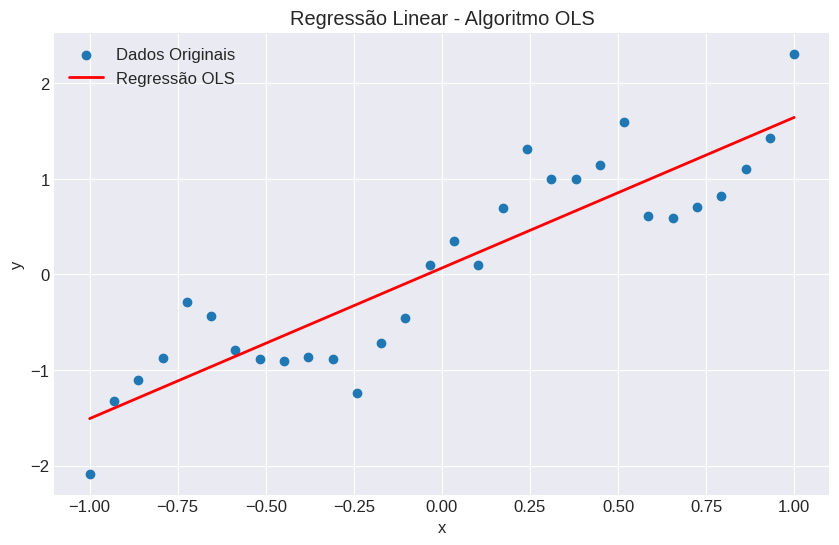

In [69]:
def ols(X, y):
    """
    Implementação do algoritmo de Mínimos Quadrados Ordinários (OLS).

    Parâmetros:
    X : array de entrada com termo de bias (coluna de uns)
    y : array de saída

    Retorna:
    theta : parâmetros do modelo (w0, w1)
    """
    # Fórmula analítica: θ = (X^T X)^(-1) X^T y
    X_transpose = X.T
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

def mse(y_true, y_pred):
    """
    Calcula o Erro Quadrático Médio (MSE).

    Parâmetros:
    y_true : valores reais
    y_pred : valores preditos

    Retorna:
    mse : erro quadrático médio
    """
    return np.mean((y_true - y_pred) ** 2)

# Aplicar o algoritmo OLS
theta_ols = ols(X_b_q1, y_q1)

# Fazer predições
y_pred_ols = X_b_q1.dot(theta_ols)

# Calcular o MSE
mse_ols = mse(y_q1, y_pred_ols)

# Exibir os resultados
print(f"Parâmetros do modelo OLS: w0 = {theta_ols[0]:.6f}, w1 = {theta_ols[1]:.6f}")
print(f"MSE do modelo OLS: {mse_ols:.6f}")

# Plotar a reta resultante sobre os dados
plt.scatter(X_q1, y_q1, label='Dados Originais')
plt.plot(X_q1, y_pred_ols, color='red', linewidth=2, label='Regressão OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear - Algoritmo OLS')
plt.legend()
plt.show()

## Item b) Algoritmo GD (Gradiente Descendente)

Implementação do algoritmo de Gradiente Descendente para encontrar os parâmetros do modelo de regressão linear.

Parâmetros do modelo GD: w0 = 0.067618, w1 = 1.568968
MSE do modelo GD: 0.213413


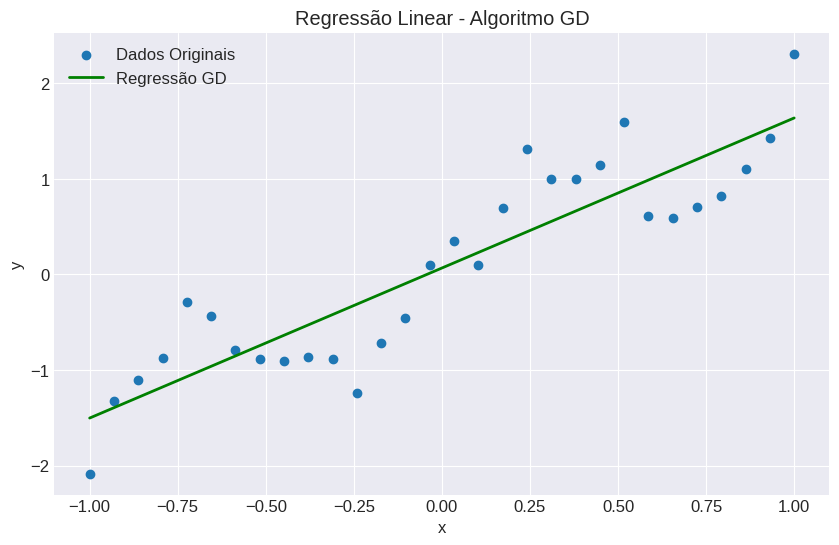

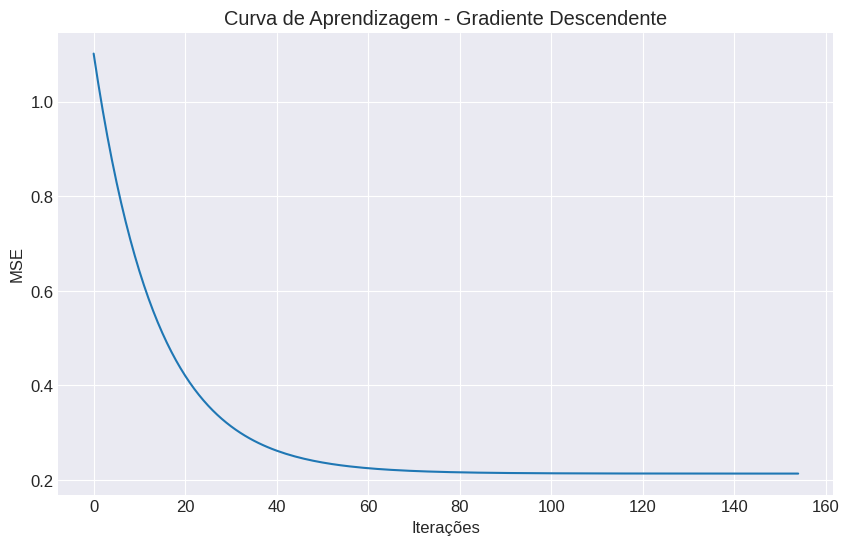

In [70]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, tol=1e-6):
    """
    Implementação do algoritmo de Gradiente Descendente (GD).

    Parâmetros:
    X : array de entrada com termo de bias (coluna de uns)
    y : array de saída
    learning_rate : taxa de aprendizado
    n_iterations : número máximo de iterações
    tol : tolerância para convergência

    Retorna:
    theta : parâmetros do modelo (w0, w1)
    mse_history : histórico de MSE para cada iteração
    """
    m = X.shape[0]  # número de exemplos
    n = X.shape[1]  # número de características (incluindo o bias)

    # Inicializar os parâmetros com zeros
    theta = np.zeros(n)

    # Histórico de MSE para a curva de aprendizagem
    mse_history = []

    # Iterações do gradiente descendente
    for i in range(n_iterations):
        # Calcular as predições
        y_pred = X.dot(theta)

        # Calcular o erro
        error = y_pred - y

        # Calcular o MSE atual
        current_mse = np.mean(error ** 2)
        mse_history.append(current_mse)

        # Verificar convergência
        if i > 0 and abs(mse_history[i-1] - current_mse) < tol:
            break

        # Calcular o gradiente: (1/m) * X^T * (X * theta - y)
        gradient = (1/m) * X.T.dot(error)

        # Atualizar os parâmetros
        theta = theta - learning_rate * gradient

    return theta, mse_history

# Aplicar o algoritmo GD
theta_gd, mse_history_gd = gradient_descent(X_b_q1, y_q1, learning_rate=0.1, n_iterations=10000)

# Fazer predições
y_pred_gd = X_b_q1.dot(theta_gd)

# Calcular o MSE
mse_gd = mse(y_q1, y_pred_gd)

# Exibir os resultados
print(f"Parâmetros do modelo GD: w0 = {theta_gd[0]:.6f}, w1 = {theta_gd[1]:.6f}")
print(f"MSE do modelo GD: {mse_gd:.6f}")

# Plotar a reta resultante sobre os dados
plt.scatter(X_q1, y_q1, label='Dados Originais')
plt.plot(X_q1, y_pred_gd, color='green', linewidth=2, label='Regressão GD')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear - Algoritmo GD')
plt.legend()
plt.show()

# Plotar a curva de aprendizagem
plt.plot(mse_history_gd)
plt.xlabel('Iterações')
plt.ylabel('MSE')
plt.title('Curva de Aprendizagem - Gradiente Descendente')
plt.grid(True)
plt.show()

## Item c) Algoritmo SGD (Gradiente Descendente Estocástico)

Implementação do algoritmo de Gradiente Descendente Estocástico para encontrar os parâmetros do modelo de regressão linear.

Parâmetros do modelo SGD: w0 = 0.069558, w1 = 1.564118
MSE do modelo SGD: 0.213446


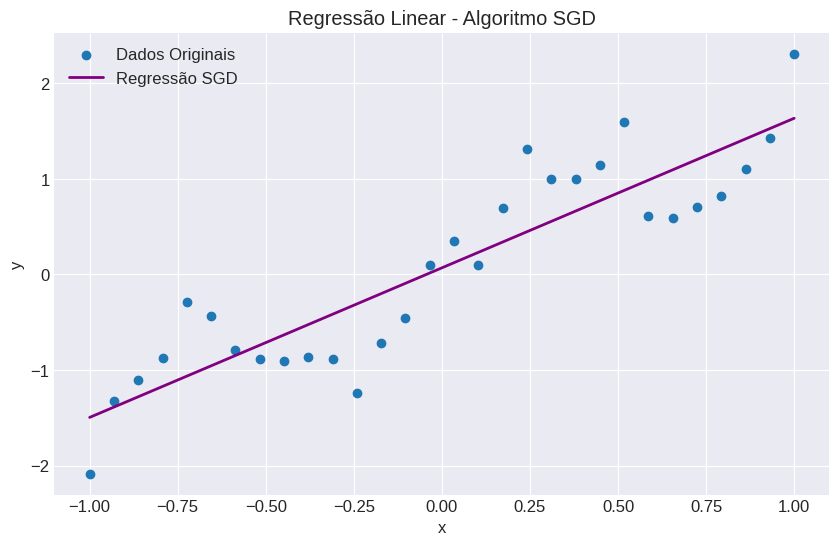

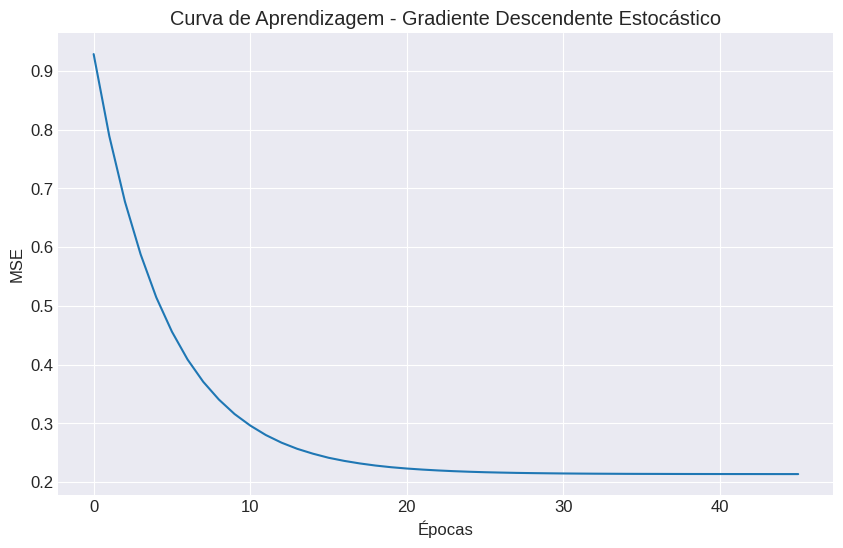

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50, tol=1e-6):
    m = X.shape[0]  # número de exemplos
    n = X.shape[1]  # número de características (incluindo o bias)

    # Inicializar os parâmetros com zeros
    theta = np.zeros(n)

    # Histórico de MSE para a curva de aprendizagem
    mse_history = []

    # Iterações do gradiente descendente estocástico
    for epoch in range(n_epochs):
        # Embaralhar os índices
        indices = np.random.permutation(m)

        # Iterar sobre cada exemplo
        for i in indices:
            # Selecionar um exemplo aleatório
            xi = X[i:i+1]
            yi = y[i:i+1]

            # Calcular a predição
            y_pred = xi.dot(theta)

            # Calcular o erro
            error = y_pred - yi

            # Calcular o gradiente para este exemplo
            gradient = xi.T.dot(error)

            # Atualizar os parâmetros
            theta = theta - learning_rate * gradient.flatten()

        # Calcular o MSE após cada época
        y_pred_epoch = X.dot(theta)
        current_mse = np.mean((y - y_pred_epoch) ** 2)
        mse_history.append(current_mse)

        # Verificar convergência
        if epoch > 0 and abs(mse_history[epoch-1] - current_mse) < tol:
            break

    return theta, mse_history

# Aplicar o algoritmo SGD
theta_sgd, mse_history_sgd = stochastic_gradient_descent(X_b_q1, y_q1, learning_rate=0.01, n_epochs=200)

# Fazer predições
y_pred_sgd = X_b_q1.dot(theta_sgd)

# Calcular o MSE
mse_sgd = mse(y_q1, y_pred_sgd)

# Exibir os resultados
print(f"Parâmetros do modelo SGD: w0 = {theta_sgd[0]:.6f}, w1 = {theta_sgd[1]:.6f}")
print(f"MSE do modelo SGD: {mse_sgd:.6f}")

# Plotar a reta resultante sobre os dados
plt.scatter(X_q1, y_q1, label='Dados Originais')
plt.plot(X_q1, y_pred_sgd, color='purple', linewidth=2, label='Regressão SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear - Algoritmo SGD')
plt.legend()
plt.show()

# Plotar a curva de aprendizagem
plt.plot(mse_history_sgd)
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('Curva de Aprendizagem - Gradiente Descendente Estocástico')
plt.grid(True)
plt.show()

# Questão 2

Considere o conjunto de dados disponível em `california.csv`, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990.

In [9]:
# Carregar os dados
data_q2 = pd.read_csv('./data/california.csv', header=None)
# Separar atributos (X) e saída (y)
X_q2 = data_q2.iloc[:, :-1].values
y_q2 = data_q2.iloc[:, -1].values

# Verificar as dimensões dos dados
print(f"Dimensões de X: {X_q2.shape}")
print(f"Dimensões de y: {y_q2.shape}")

Dimensões de X: (1000, 8)
Dimensões de y: (1000,)


## Implementação de classes para normalização

Conforme solicitado, vamos implementar classes para normalização dos dados.

In [ ]:
class MinMaxScaler:
    def fit(self, X):
        self.min_, self.max_ = np.min(X, axis=0), np.max(X, axis=0)
        return self
    def transform(self, X):
        return (X - self.min_) / (self.max_ - self.min_ + 1e-9)
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    def inverse_transform(self, X):
        return X * (self.max_ - self.min_ + 1e-9) + self.min_

class StandardScaler:
    def fit(self, X):
        self.mean_, self.std_ = np.mean(X, axis=0), np.std(X, axis=0)
        return self
    def transform(self, X):
        return (X - self.mean_) / (self.std_ + 1e-9)
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    def inverse_transform(self, X):
        return X * (self.std_ + 1e-9) + self.mean_


## Implementação da classe para regressão polinomial

In [30]:
class PolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree
    def fit(self, X):
        return self
    def transform(self, X):
        m, n = X.shape
        X_poly = np.ones((m, 1))
        for d in range(1, self.degree + 1):
            X_poly = np.hstack((X_poly, X ** d))
        return X_poly
    def fit_transform(self, X):
        return self.fit(X).transform(X)

## Implementação da classe para regressão linear com regularização L2

In [38]:
class LinearRegression:
    def __init__(self, alpha=0.0):
        self.alpha = alpha
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        I = np.eye(n); I[0, 0] = 0
        A = X.T @ X + self.alpha * I
        try:
            self.theta = np.linalg.inv(A) @ X.T @ y
        except np.linalg.LinAlgError:
            self.theta = np.linalg.pinv(A) @ X.T @ y
        return self

    def predict(self, X):
        return X @ self.theta

## Função para calcular RMSE

In [45]:
def rmse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean() ** 0.5


## Item a) Divisão do conjunto de dados em treino e teste

In [51]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    m = X.shape[0]
    idx = np.random.permutation(m)
    s = int(m * test_size)
    return X[idx[s:]], X[idx[:s]], y[idx[s:]], y[idx[:s]]

X_train, X_test, y_train, y_test = train_test_split(X_q2, y_q2, test_size=0.2, random_state=42)


# Verificar as dimensões dos conjuntos de treino e teste
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (800, 8)
Dimensões de X_test: (200, 8)
Dimensões de y_train: (800,)
Dimensões de y_test: (200,)


## Normalização dos dados

In [52]:
X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train[:, None]).ravel()
y_test_scaled = y_scaler.transform(y_test[:, None])


## Item b) e c) Treinamento de modelos de regressão polinomial sem regularização

Grau 1: RMSE Treino = 0.6405, RMSE Teste = 0.7910
Grau 2: RMSE Treino = 0.6166, RMSE Teste = 0.7902
Grau 3: RMSE Treino = 0.5907, RMSE Teste = 1.0841
Grau 4: RMSE Treino = 0.5828, RMSE Teste = 2.8049
Grau 5: RMSE Treino = 0.5759, RMSE Teste = 2.0066
Grau 6: RMSE Treino = 0.5703, RMSE Teste = 31.2620
Grau 7: RMSE Treino = 0.5653, RMSE Teste = 28.9097
Grau 8: RMSE Treino = 0.5612, RMSE Teste = 5027.2295
Grau 9: RMSE Treino = 0.5587, RMSE Teste = 36806.8523
Grau 10: RMSE Treino = 1.2582, RMSE Teste = 1118537.4358
Grau 11: RMSE Treino = 0.5573, RMSE Teste = 34984.8955
Grau 12: RMSE Treino = 0.7542, RMSE Teste = 6907194.1702
Grau 13: RMSE Treino = 0.5585, RMSE Teste = 2582988.5691


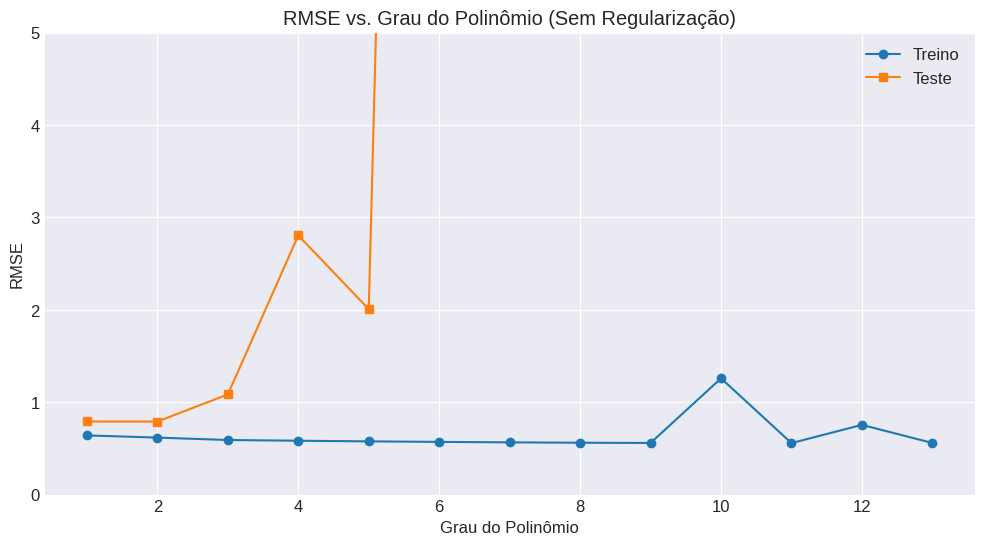

In [61]:
# Listas para armazenar os resultados
degrees = range(1, 14)  # Ordens de 1 a 13
train_rmse_list = []
test_rmse_list = []

# Treinar modelos de regressão polinomial sem regularização
for degree in degrees:
    # Transformar as características para polinomiais
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Treinar o modelo
    model = LinearRegression(alpha=0.0)  # Sem regularização
    model.fit(X_train_poly, y_train_scaled_flat) # Use flattened scaled y

    # Fazer predições (scaled)
    y_train_pred_scaled = model.predict(X_train_poly)
    y_test_pred_scaled = model.predict(X_test_poly)

    # "Desnormalizar" as predições
    y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
    y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

    # Calcular o RMSE
    current_train_rmse = rmse(y_train, y_train_pred)
    current_test_rmse = rmse(y_test, y_test_pred)
    train_rmse_list.append(current_train_rmse)
    test_rmse_list.append(current_test_rmse)

    print(f"Grau {degree}: RMSE Treino = {current_train_rmse:.4f}, RMSE Teste = {current_test_rmse:.4f}")

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_rmse_list, 'o-', label='Treino')
plt.plot(degrees, test_rmse_list, 's-', label='Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE vs. Grau do Polinômio (Sem Regularização)')
plt.legend()
plt.grid(True)
# Limit y-axis if necessary due to potential explosion for high degrees
max_rmse_test = max(test_rmse_list) if test_rmse_list else 1
plt.ylim(0, min(max_rmse_test * 2, 5)) # Limit y-axis to avoid extreme values, adjust as needed
plt.show()

## Item d) Treinamento de modelos de regressão polinomial com regularização L2

Grau 1 (Reg L2): RMSE Treino = 0.6405, RMSE Teste = 0.7905
Grau 2 (Reg L2): RMSE Treino = 0.6167, RMSE Teste = 0.7857
Grau 3 (Reg L2): RMSE Treino = 0.5987, RMSE Teste = 0.7605
Grau 4 (Reg L2): RMSE Treino = 0.5955, RMSE Teste = 0.7963
Grau 5 (Reg L2): RMSE Treino = 0.5943, RMSE Teste = 0.9494
Grau 6 (Reg L2): RMSE Treino = 0.5940, RMSE Teste = 1.1556
Grau 7 (Reg L2): RMSE Treino = 0.5936, RMSE Teste = 1.2941
Grau 8 (Reg L2): RMSE Treino = 0.5930, RMSE Teste = 1.2693
Grau 9 (Reg L2): RMSE Treino = 0.5922, RMSE Teste = 1.0389
Grau 10 (Reg L2): RMSE Treino = 0.5914, RMSE Teste = 0.7526
Grau 11 (Reg L2): RMSE Treino = 0.5907, RMSE Teste = 1.2090
Grau 12 (Reg L2): RMSE Treino = 0.5902, RMSE Teste = 2.5357
Grau 13 (Reg L2): RMSE Treino = 0.5898, RMSE Teste = 4.4489


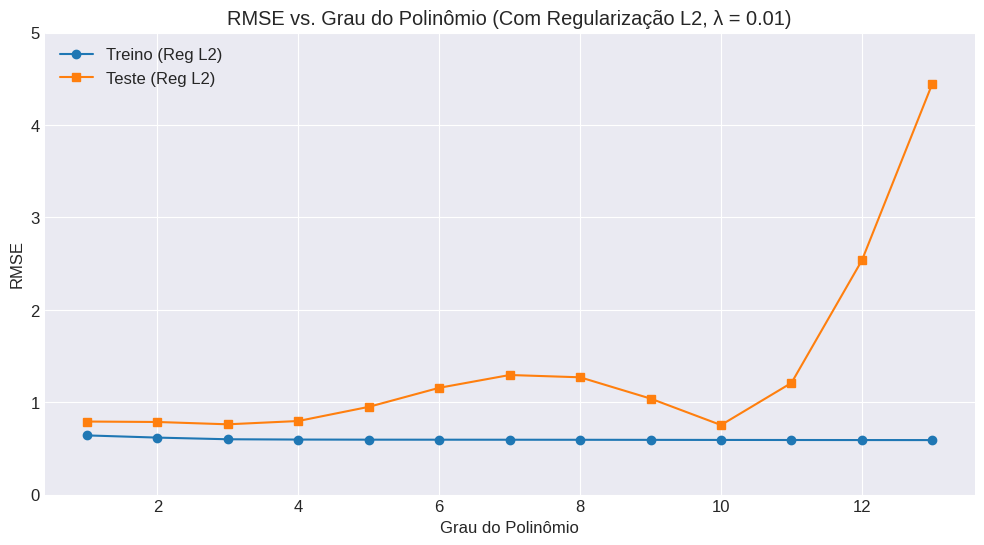

In [54]:
# Listas para armazenar os resultados com regularização
train_rmse_reg_list = []
test_rmse_reg_list = []
lambda_value = 0.01  # Fator de regularização L2

# Treinar modelos de regressão polinomial com regularização L2
for degree in degrees:
    # Transformar as características para polinomiais
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Treinar o modelo com regularização L2
    model_reg = LinearRegression(alpha=lambda_value)
    model_reg.fit(X_train_poly, y_train_scaled_flat) # Use flattened scaled y

    # Fazer predições (scaled)
    y_train_pred_scaled_reg = model_reg.predict(X_train_poly)
    y_test_pred_scaled_reg = model_reg.predict(X_test_poly)

    # "Desnormalizar" as predições
    y_train_pred_reg = y_scaler.inverse_transform(y_train_pred_scaled_reg.reshape(-1, 1)).flatten()
    y_test_pred_reg = y_scaler.inverse_transform(y_test_pred_scaled_reg.reshape(-1, 1)).flatten()

    # Calcular o RMSE
    current_train_rmse_reg = rmse(y_train, y_train_pred_reg)
    current_test_rmse_reg = rmse(y_test, y_test_pred_reg)
    train_rmse_reg_list.append(current_train_rmse_reg)
    test_rmse_reg_list.append(current_test_rmse_reg)

    print(f"Grau {degree} (Reg L2): RMSE Treino = {current_train_rmse_reg:.4f}, RMSE Teste = {current_test_rmse_reg:.4f}")

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_rmse_reg_list, 'o-', label='Treino (Reg L2)')
plt.plot(degrees, test_rmse_reg_list, 's-', label='Teste (Reg L2)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title(f'RMSE vs. Grau do Polinômio (Com Regularização L2, λ = {lambda_value})')
plt.legend()
plt.grid(True)
max_rmse_test_reg = max(test_rmse_reg_list) if test_rmse_reg_list else 1
plt.ylim(0, min(max_rmse_test_reg * 2, 5)) # Limit y-axis, adjust as needed
plt.show()

## Comparação dos resultados com e sem regularização

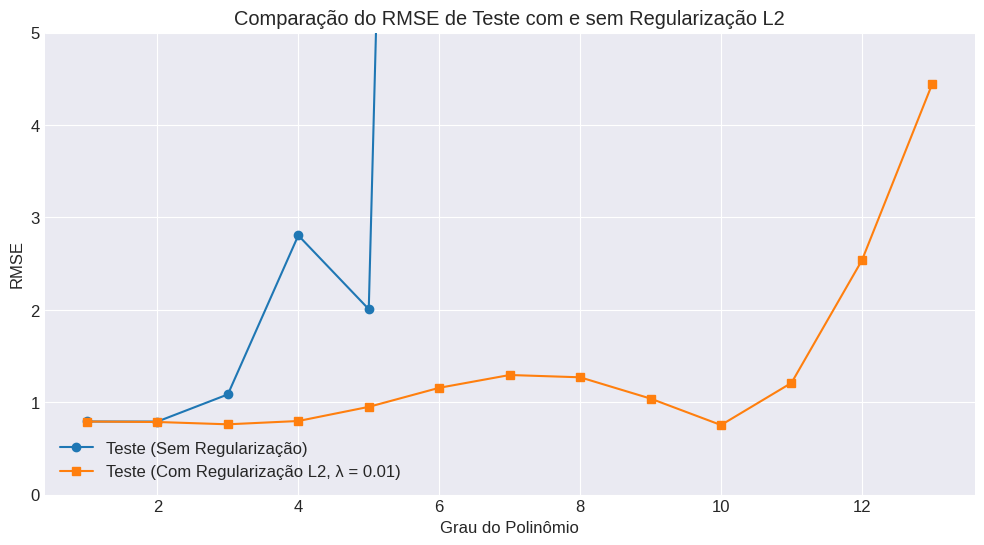

In [55]:
# Plotar os resultados de teste com e sem regularização
plt.figure(figsize=(12, 6))
plt.plot(degrees, test_rmse_list, 'o-', label='Teste (Sem Regularização)')
plt.plot(degrees, test_rmse_reg_list, 's-', label=f'Teste (Com Regularização L2, λ = {lambda_value})')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('Comparação do RMSE de Teste com e sem Regularização L2')
plt.legend()
plt.grid(True)
# Adjust y-axis limits for better comparison
y_max_comp = max(max(test_rmse_list) if test_rmse_list else 0, max(test_rmse_reg_list) if test_rmse_reg_list else 0)
plt.ylim(0, min(y_max_comp * 1.5, 5)) # Limit y-axis, adjust as needed
plt.show()